# Astropy Cosmologies

Astropy includes a convenient framework for defining cosmologies and working with realizations thereof.  These realizations hold the cosmological parameters and enable computation of a variety of redshift-parameterized properties, e.g. the luminosity distance.

For more information about the features presented below, please see the
[astropy.cosmology](https://docs.astropy.org/en/stable/cosmology/index.html) docs.

Also note that this tutorial assumes you have little or no knowledge of the astropy cosmology docs.  If you're familiar with them and have interest in extending this framework to more cosmologies, realizations, or methods, Astropy always welcomes contributions.

**TODO writing is rewriting**

## Introduction

The [``astropy.cosmology``](https://docs.astropy.org/en/stable/cosmology/index.html) package provides an object-oriented approach to cosmology that tightly integrates with the rest of the Astropy ecosystem, and units in particular.

With that in mind, the following is the standard set of imports to begin working with the cosmology package.

In [1]:
import astropy.units as u
from astropy import cosmology

The first thing we will need is to select a cosmology, essentially the physics, in which to work. The most commonly used is a flat $\Lambda$CDM cosmology with a Friedmann–Lemaître–Robertson–Walker (FLRW) metric; and we will use it here as well.

Concordant to OOP, in ``astropy.cosmology`` the cosmology types are classes, so we can import the flat-$\Lambda$CDM cosmology and examine its public methods and attributes:

In [2]:
from astropy.cosmology import FlatLambdaCDM

print("Attributes: ", {x for x in dir(FlatLambdaCDM) if
                       (not x.startswith("_") and not callable(getattr(FlatLambdaCDM, x)))})
print("\nMethods: ", {x for x in dir(FlatLambdaCDM) if
                      (not x.startswith("_") and callable(getattr(FlatLambdaCDM, x)))})

Attributes:  {'Ode0', 'critical_density0', 'Tcmb0', 'Onu0', 'Ogamma0', 'hubble_time', 'm_nu', 'Neff', 'has_massive_nu', 'H0', 'Ok0', 'Om0', 'Ob0', 'h', 'hubble_distance', 'Tnu0', 'name', 'Odm0'}

Methods:  {'Ok', 'angular_diameter_distance', 'absorption_distance', 'Om', 'differential_comoving_volume', 'comoving_transverse_distance', 'Ob', 'kpc_proper_per_arcmin', 'kpc_comoving_per_arcmin', 'comoving_distance', 'distmod', 'lookback_distance', 'Tcmb', 'de_density_scale', 'lookback_time_integrand', 'age', 'efunc', 'w', 'Onu', 'inv_efunc', 'H', 'luminosity_distance', 'nu_relative_density', 'lookback_time', 'Ode', 'abs_distance_integrand', 'arcsec_per_kpc_proper', 'Odm', 'Tnu', 'comoving_volume', 'clone', 'Ogamma', 'scale_factor', 'critical_density', 'angular_diameter_distance_z1z2', 'arcsec_per_kpc_comoving'}


Most of the attributes are for components to the energy density or derivations like the Hubble time.

The methods are for more involved calculations, like integrating to find the comoving volume.

Before we dive into using the ``FlatLambdaCDM`` cosmology, it is worth noting that there are numerous other cosmologies for extensions to dark energy.

In [3]:
from astropy.cosmology import Cosmology  # the base class

def all_subclasses(cosmo):
    yield cosmo.__qualname__
    for c in cosmo.__subclasses__(): yield from all_subclasses(c)

print("Other available cosmologies:", ", ".join(all_subclasses(Cosmology)))

Other available cosmologies: Cosmology, FLRW, LambdaCDM, FlatLambdaCDM, wCDM, FlatwCDM, w0waCDM, Flatw0waCDM, wpwaCDM, w0wzCDM


To work with a cosmology we must create an instance, a *realization*, of the cosmology.

In [4]:
cosmo = FlatLambdaCDM(H0=70*u.km/u.s/u.Mpc, Om0=0.3, Tcmb0=2.7*u.K)
cosmo

FlatLambdaCDM(H0=70 km / (Mpc s), Om0=0.3, Tcmb0=2.7 K, Neff=3.04, m_nu=[0. 0. 0.] eV, Ob0=None)

Now the attributes and methods shown above can be called.

In [5]:
cosmo.H0

<Quantity 70. km / (Mpc s)>

In [6]:
cosmo.hubble_time

<Quantity 13.96846031 Gyr>

In [7]:
cosmo.angular_diameter_distance_z1z2(2, 4)

<Quantity 397.89919802 Mpc>

In [8]:
# these also work with vectorized input
cosmo.comoving_distance([1, 2, 3, 4, 5])

<Quantity [3303.53737457, 5179.04318219, 6354.34269871, 7168.53917228,
           7773.09684295] Mpc>

## Built-in Cosmology Realizations


While the cosmology classes support arbitry realizationss, most often we are looking to work with a "standard" cosmology, such as the Planck 2018 best-fit values.

Astropy provides number of built-in realizations:

In [9]:
print(cosmology.realizations.__all__[1:])

['Planck18', 'Planck18_arXiv_v2', 'Planck15', 'Planck13', 'WMAP9', 'WMAP7', 'WMAP5']


From hereon we will work with the ``Planck18`` realization.

In [10]:
from astropy.cosmology import Planck18
Planck18

FlatLambdaCDM(name="Planck18", H0=67.7 km / (Mpc s), Om0=0.31, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.049)

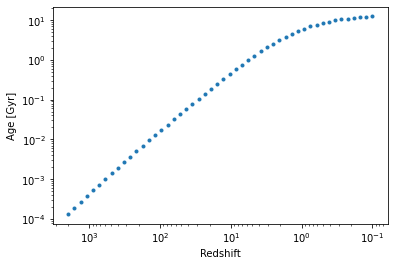

In [11]:
import numpy as np
import matplotlib.pyplot as plt

z = np.geomspace(0.1, 2e3)
plt.loglog(z, Planck18.age(z), ".")
plt.gca().invert_xaxis()
plt.xlabel("Redshift")
plt.ylabel("Age [Gyr]")
plt.show();

### Modifying a Realization

Cosmology realizations are immutable, but it's often useful to "perturb" about a cosmology. For this cosmologies have a ``clone`` method that can also override any value. For example,

In [12]:
newcosmo = Planck18.clone(Om0=0.4, Ob0=0.3)
newcosmo

FlatLambdaCDM(name="Planck18 (modified)", H0=67.7 km / (Mpc s), Om0=0.4, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.3)

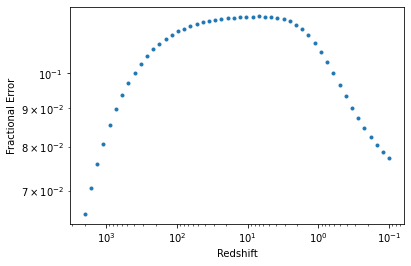

In [25]:
z = np.geomspace(0.1, 2e3)
plt.loglog(z, np.abs(newcosmo.age(z)/Planck18.age(z) - 1), ".")
plt.gca().invert_xaxis()
plt.xlabel("Redshift")
plt.ylabel("Fractional Error")
plt.show();

## The Default Realization

In [14]:
cosmology.default_cosmology.get()

FlatLambdaCDM(name="Planck18", H0=67.7 km / (Mpc s), Om0=0.31, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.049)

In [15]:
with cosmology.default_cosmology.set("WMAP5"):
    cosmo = cosmology.default_cosmology.get()
    print(cosmo)

FlatLambdaCDM(name="WMAP5", H0=70.2 km / (Mpc s), Om0=0.277, Tcmb0=2.725 K, Neff=3.04, m_nu=[0. 0. 0.] eV, Ob0=0.0459)


In [26]:
from astropy.coordinates import Distance

In [33]:
d = Distance(100 * u.Mpc)

In [34]:
dz = d.z
dz

0.02219437761440318

In [35]:
with cosmology.default_cosmology.set("WMAP5"):
    print(d.z - dz)

0.0008059197634152568


## Equivalencies

Equivalencies can be used to convert quantities that are not strictly the same physical type, but in a specific context are interchangable.  

In [17]:
distance = 105 * (u.Mpc/u.littleh)

In [18]:
# This raises an error because they are different units.
try:
    distance.to(u.Mpc)
except u.UnitConversionError:
    print("Cannot convert incompatible units.")

Cannot convert incompatible units.


For cosmologies, Astropy offers a $h$ - $H_0$ equivalency for switching between the unitless and unit-ful Hubble constant. 

In [19]:
# This succeeds using equivalencies.
H0_70 = 70 * u.km / u.s / u.Mpc

distance.to(u.Mpc, u.with_H0(H0_70))

<Quantity 150. Mpc>

And vice versa

In [20]:
(150 * u.Mpc).to(u.Mpc/u.littleh, u.with_H0(H0_70))

<Quantity 105. Mpc / littleh>

This equivalency works for arbitrary Quantities.

In [21]:
luminosity = 0.49 * u.Lsun * u.littleh**-2
luminosity.to(u.Lsun, u.with_H0(H0_70))

<Quantity 1. solLum>

Note that the equivalency is cosmology dependent.

In [40]:
print(distance.to(u.Mpc, u.with_H0(H0_70)),
      distance.to(u.Mpc, u.with_H0(Planck18.H0)), sep="\n")

150.0 Mpc
155.1877032219923 Mpc


To perform a number of computations with the same cosmology, use [astropy.units.add_enabled_equivalencies](https://docs.astropy.org/en/stable/api/astropy.units.add_enabled_equivalencies.html?highlight=add_enabled_equivalencies). When done as a ``with`` statement, this equivalency will only be enabled within the block and prevent mistakenly using the Planck18 equivalency when working with, e.g., WMAP data.

In [23]:
with u.add_enabled_equivalencies(u.with_H0(Planck18.H0)):
    print(f"distance: {distance.to(u.Mpc)}",
          f"luminosity: {luminosity.to(u.Lsun)}",sep="\n")

distance: 155.1877032219923 Mpc
luminosity: 1.0703654769474296 solLum


There's a lot of flexibility with equivalencies, including a variety of other built-in equivalencies, useful in difference contexts.  So if you want to know more, you might want to check out the [equivalencies narrative documentation](https://docs.astropy.org/en/stable/units/equivalencies.html) or the [astropy.units.equivalencies reference docs](https://docs.astropy.org/en/stable/units/index.html#module-astropy.units.equivalencies).

# Putting it all together:  a concise example


# Exercises

## Exercise 1

Compute redshift of matter-radiation equality for the Planck 2018 flat-$\Lambda$CDM realization.

In [ ]:
# Answer here (z)

In [ ]:
# Answer here (comoving distance)